In [6]:
import numpy as np
import matplotlib.pyplot as plt
import particle 
p = particle.Particle.from_name
plt.rcParams.update({"xtick.top": True , "ytick.right": True,
"xtick.minor.visible": True, "ytick.minor.visible": True,
"xtick.direction": "in" , "ytick.direction": "in",
"axes.labelsize": "large", "text.usetex": False, "font.size": 11})


In [7]:
n = 1.0017
std = 2e-3 # rad
m_K = p("K+").mass * 1e6 # eV
m_pi = p("pi+").mass * 1e6 # eV
m = (m_K + m_pi)/2 # eV

In [8]:
beta = np.vectorize(lambda p: p / np.sqrt(m**2 + p**2))
N_std = np.vectorize(lambda p: abs(m_K**2 - m_pi**2) * beta(p)**2 / (2 * p**2 * std * np.sqrt(n**2 * beta(p)**2 - 1)))

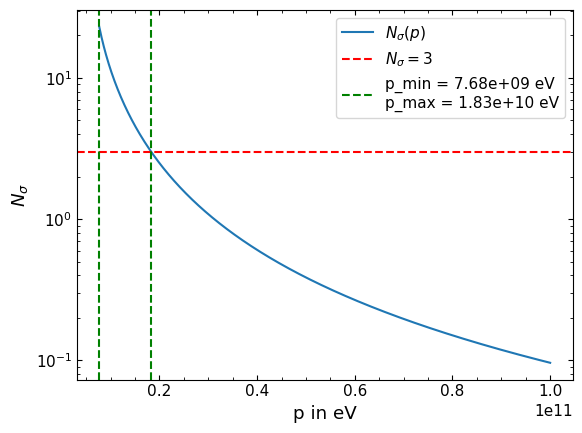

In [13]:
lim = [m/np.sqrt(n-1), 1e11]
P = np.linspace(*lim, 1000)
N = N_std(P)
p_max = P[np.argmin(abs(N-3))]

plt.plot(P, N, label=r"$N_\sigma(p)$")
plt.axhline(3, c="r", linestyle="--", label=r"$N_\sigma=3$")
plt.axvline(p_max, c="g", linestyle="--", label=f"p_min = {lim[0]:.3} eV\n{p_max = :.3} eV")
plt.axvline(lim[0], c="g", linestyle="--")

plt.xlabel("p in eV")
plt.ylabel(r"$N_\sigma$")
plt.yscale("log")
plt.legend()
plt.savefig("3.svg")